<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Machine_Learning/1_K_NN(%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사이킷런을 활용한 머신러닝 공부용 라이브러리
!pip install mglearn

# K-NN (K-Nearest Neighbors)

최근접 이웃 알고리즘은 데이터포인트 주변에 가장 가까운 데이터포인트 k개를 기준으로 결정 짓는 알고리즘. 분류, 회귀 모두 사용 가능함

In [2]:
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

## K_NN 분류

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


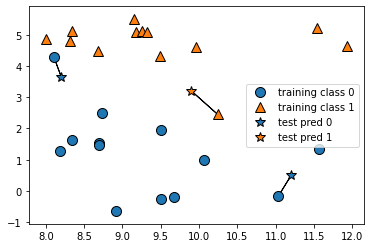

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # 이웃의 개수를 1개로 설정

K-NN 알고리즘에서 이웃의 개수를 조절하면 복잡도가 조절된다.
  - 이웃의 개수가 늘어나면 K-NN의 복잡도는 내려간다.

In [4]:
from sklearn.model_selection import train_test_split
# K-NN 사용하기

# 1. 데이터 불러오기
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
# 2. K-NN 분류기 불러오기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 3. 훈련하기
clf.fit(X_train, y_train)

# 4. 테스트 세트 예측
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))

# 5. 테스트 세트 점수 확인
print("테스트 세트 점수 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 점수 : 0.86


score의 뜻: 모델이 테스트셋에 있는 샘플 중 86%를 정확하게 분류했음

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, # 계층적 분할을 수행할 데이터 지정
                                                    random_state=66)

In [8]:
# 정확도를 기록하기 위한 리스트 생성
train_accuracy = []
test_accuracy = []

# 이웃의 개수를 설정(1~10개)
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성하기
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)

  # 훈련
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장하기
  train_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

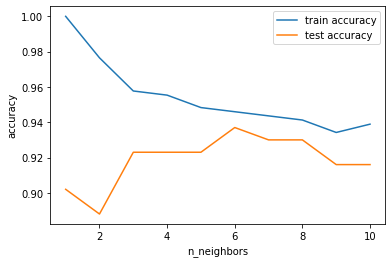

In [10]:
# 시각화
# x축: 이웃의 개수, y축: 이웃의 개수에 따른 정확도
plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## K_NN Regression

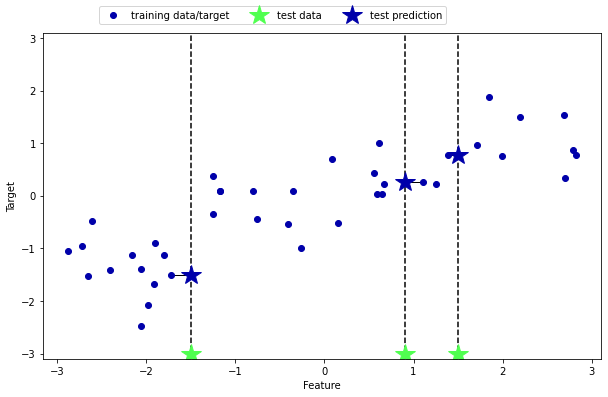

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

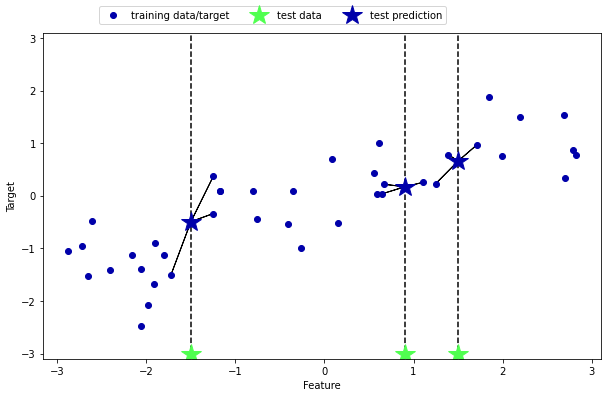

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))
print("테스트 세트 점수 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 점수 : 0.83


$R^2$은 결정계수라고 한다. 회귀에서의 스코어링에 사용된다.
  - $y$ : target
  - $\bar{y}$ : 훈련된 데이터의 평균 (y값들의 평균)
  - $\hat{y}$ : 예측값

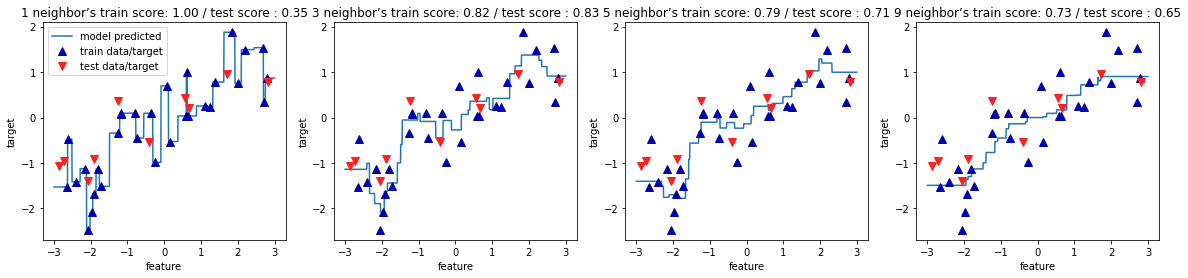

In [21]:
import numpy as np
fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title("{} neighbor’s train score: {:.2f} / test score : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

axes[0].legend(["model predicted", "train data/target", "test data/target"], loc="best")